<a href="https://colab.research.google.com/github/GVSU-CIS635/projects-outliers/blob/prophet-model/prophet_model_(second_draft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
url = "streamflow_filled_ARIMA.csv"
df = pd.read_csv(url)

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index()
df = df[["Q (m3/s)"]].rename(columns={"Q (m3/s)": "Q_m3_s"})
print(df.head(), df.shape)

            Q_m3_s
Date              
1967-01-01  2690.0
1967-01-02  2650.0
1967-01-03  2650.0
1967-01-04  2610.0
1967-01-05  2570.0 (18628, 1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18628 entries, 1967-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q_m3_s  18628 non-null  float64
dtypes: float64(1)
memory usage: 291.1 KB


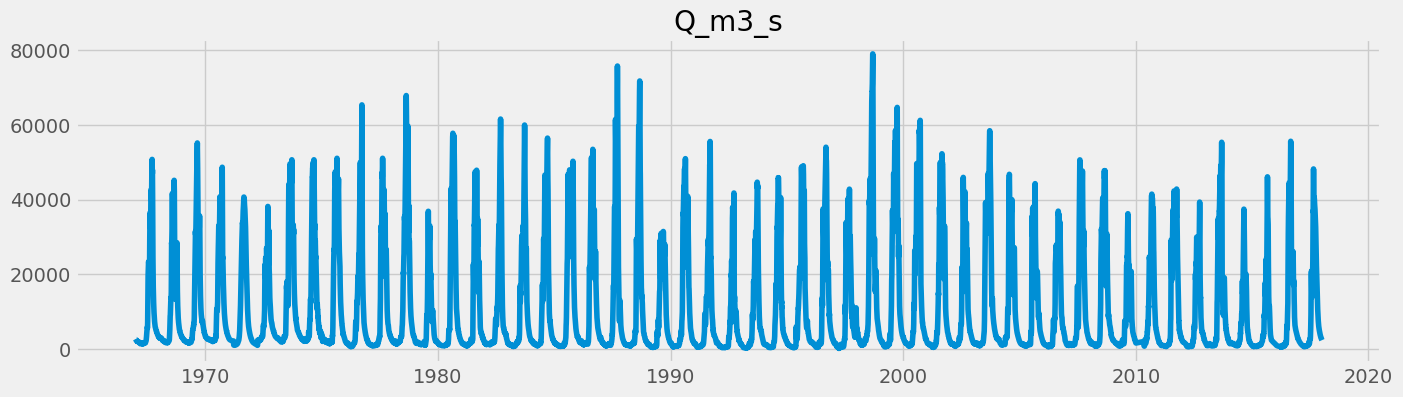

In [5]:
df.info()

plt.figure(figsize=(15,4))
plt.plot(df.index, df["Q_m3_s"])
plt.title("Q_m3_s")
plt.show()

In [6]:
test_h = 730
dftrain = df.iloc[:-test_h]
dftest = df.iloc[-test_h:]

In [7]:
dftrain = dftrain.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

In [8]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      17898 non-null  datetime64[ns]
 1   y       17898 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 279.8 KB


In [49]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)
model.fit(dftrain)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kir3fsn/diu4phw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2kir3fsn/qxxm432_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66062', 'data', 'file=/tmp/tmp2kir3fsn/diu4phw4.json', 'init=/tmp/tmp2kir3fsn/qxxm432_.json', 'output', 'file=/tmp/tmp2kir3fsn/prophet_model0i9h4xkq/prophet_model-20251118163013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
dftest = dftest.reset_index() \
    .rename(columns={'Date':'ds',
                     'Q_m3_s':'y'})

ValueError: cannot insert level_0, already exists

In [52]:
test_forecast = model.predict(dftest)

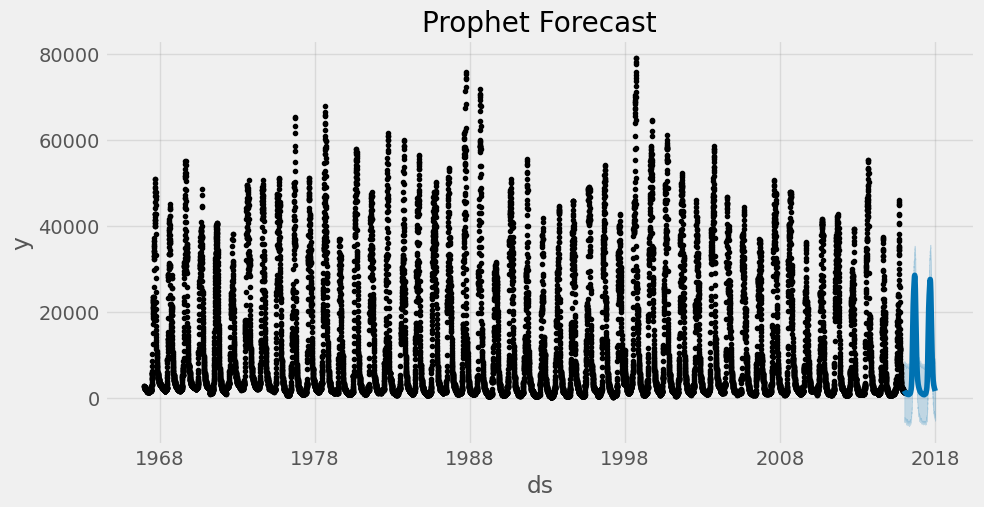

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [54]:
np.sqrt(mean_squared_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat']))

np.float64(6098.6159342541305)

In [55]:
mean_absolute_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat'])

3056.2287164944146

In [56]:
mean_absolute_percentage_error(y_true=dftest['y'],
                   y_pred=test_forecast['yhat'])

np.float64(25.173528647611064)

In [57]:
dftest.head()

,level_0,index,ds,y
0,0,0,2016-01-02,1309.0
1,1,1,2016-01-03,1284.0
2,2,2,2016-01-04,1266.0
3,3,3,2016-01-05,1242.0
4,4,4,2016-01-06,1224.0


In [58]:
dftrain.head()

,ds,y
0,1967-01-01,2690.0
1,1967-01-02,2650.0
2,1967-01-03,2650.0
3,1967-01-04,2610.0
4,1967-01-05,2570.0


In [59]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-02,7785.509060,-5104.698671,8564.321174,7785.509060,7785.509060,-0.786179,-0.786179,-0.786179,0.000105,0.000105,0.000105,-0.786284,-0.786284,-0.786284,0.0,0.0,0.0,1664.701735
1,2016-01-03,7784.808682,-5062.480717,7593.495458,7784.808682,7784.808682,-0.789253,-0.789253,-0.789253,0.000394,0.000394,0.000394,-0.789646,-0.789646,-0.789646,0.0,0.0,0.0,1640.626995
2,2016-01-04,7784.108304,-4478.375661,7979.594200,7784.108304,7784.108304,-0.791813,-0.791813,-0.791813,0.001034,0.001034,0.001034,-0.792847,-0.792847,-0.792847,0.0,0.0,0.0,1620.546703
3,2016-01-05,7783.407926,-5632.117853,7774.320253,7783.407926,7783.407926,-0.795840,-0.795840,-0.795840,0.000049,0.000049,0.000049,-0.795889,-0.795889,-0.795889,0.0,0.0,0.0,1589.059561
4,2016-01-06,7782.707548,-5198.961784,7818.302484,7782.707548,7782.707548,-0.799604,-0.799604,-0.799604,-0.000829,-0.000829,-0.000829,-0.798775,-0.798775,-0.798775,0.0,0.0,0.0,1559.622588
